### Treść zadania

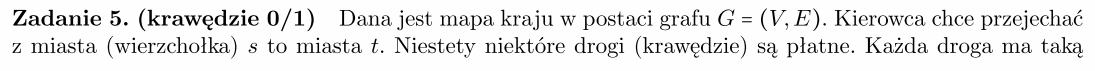
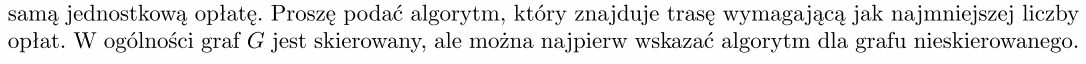

# 1) Naiwne rozwiązanie

### Omówienie algorytmu

To zadanie najłatwiej rozwiązać, przy pomocy algorytmu Dijkstry. <br>
Omówienie algorytmu #1:
###### LINK : https://www.youtube.com/watch?v=K_1urzWrzLs
Omówienie algorytmu #2: <br>
###### LINK: https://www.youtube.com/watch?v=pSqmAO-m7Lk

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(V)) $ - w takim czasie działa poniższa implementacja algorytmu Dijkstry
###### Pamięciowa:
$ O(V) $ - zazwyczaj, ale dla gęstych grafów może być wyższa, bo w kolejce będzie sporo przedawnionych wartości

### Implementacja #1
##### (Dla grafu nieskierowanego)

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    visited = [False] * n
    parents = [-1] * n
    dist = [inf] * n 
    dist[s] = 0
    # Initialize a priority queue where we will store (vertex, min distance) pairs
    # sorted by the minimum priority
    pq = PriorityQueue()
    pq.put((0, s))
    
    while not pq.empty():
        min_dist, u = pq.get()
        visited[u] = True  # Mark as visited
        # Skip a vertex if there was already found a better distance
        if dist[u] < min_dist: continue
        # Loop over all the neighbours and check if we can update some of them
        for v, weight in G[u]:
            if visited[v]: continue
            new_dist = dist[u] + weight
            # Update the distance from source to v vertex if found a shorter path
            if new_dist < dist[v]:
                dist[v] = new_dist
                parents[v] = u
                pq.put((new_dist, v))
        # Stop a while loop if we have already found a distance to the target
        if u == t: return dist[u], parents
                
    # Otherwise, we cannot reach the target
    return inf, []


def restore_path(parents, s, t):
    path = [t]
    u = t
    while parents[u] != s:
        u = parents[u]
        path.append(u)
    path.append(s)
    # Reverse a path to get subsequent vertices in the right order
    return path[::-1]


def min_cost_path(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    cost, parents = dijkstra(G, s, t)
    # Return None if there is no path from the source to the target
    if cost == float('inf'): return None
    return cost, restore_path(parents, s, t)


def undirected_graph_list(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph array
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))  # edge[2] is a weight of an edge
        G[edge[1]].append((edge[0], edge[2]))  # edge[2] is a weight of an edge
    return G

###### Kilka testów

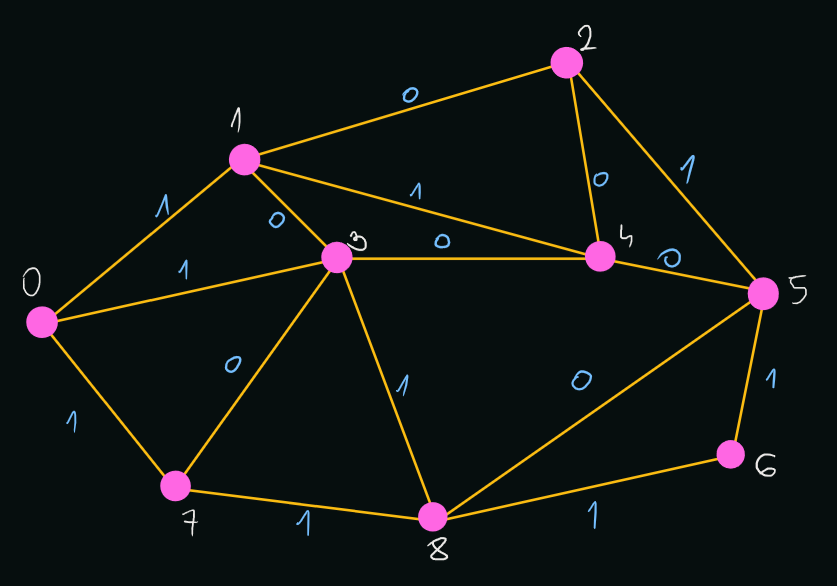

In [2]:
E = [(0, 1, 1), (1, 2, 0), (1, 4, 1), (2, 4, 0), (2, 5, 1), (0, 3, 1), (3, 4, 0), (4, 5, 0),
     (0, 7, 1), (7, 3, 0), (3, 8, 1), (7, 8, 1), (8, 5, 0), (8, 6, 1), (6, 5, 1), (1, 3, 0)]
G = undirected_graph_list(E)
print(*G, sep='\n')

[(1, 1), (3, 1), (7, 1)]
[(0, 1), (2, 0), (4, 1), (3, 0)]
[(1, 0), (4, 0), (5, 1)]
[(0, 1), (4, 0), (7, 0), (8, 1), (1, 0)]
[(1, 1), (2, 0), (3, 0), (5, 0)]
[(2, 1), (4, 0), (8, 0), (6, 1)]
[(8, 1), (5, 1)]
[(0, 1), (3, 0), (8, 1)]
[(3, 1), (7, 1), (5, 0), (6, 1)]


In [3]:
print(min_cost_path(G, 0, 8))

(1, [0, 1, 2, 4, 5, 8])


In [4]:
print(min_cost_path(G, 0, 6))

(2, [0, 1, 2, 4, 5, 6])


In [5]:
print(min_cost_path(G, 8, 2))

(0, [8, 5, 4, 2])


### Implementacja #2
##### (Dla grafu skierowanego - implementacja niemal identyczna)

In [6]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    visited = [False] * n
    parents = [-1] * n
    dist = [inf] * n 
    dist[s] = 0
    # Initialize a priority queue where we will store (vertex, min distance) pairs
    # sorted by the minimum priority
    pq = PriorityQueue()
    pq.put((0, s))
    
    while not pq.empty():
        min_dist, u = pq.get()
        visited[u] = True  # Mark as visited
        # Skip a vertex if there was already found a better distance
        if dist[u] < min_dist: continue
        # Loop over all the neighbours and check if we can update some of them
        for v, weight in G[u]:
            if visited[v]: continue
            new_dist = dist[u] + weight
            # Update the distance from source to v vertex if found a shorter path
            if new_dist < dist[v]:
                dist[v] = new_dist
                parents[v] = u
                pq.put((new_dist, v))
        # Stop a while loop if we have already found a distance to the target
        if u == t: return dist[u], parents
                
    # Otherwise, we cannot reach the target
    return inf, []


def restore_path(parents, s, t):
    path = [t]
    u = t
    while parents[u] != s:
        u = parents[u]
        path.append(u)
    path.append(s)
    # Reverse a path to get subsequent vertices in the right order
    return path[::-1]


def min_cost_path(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    cost, parents = dijkstra(G, s, t)
    # Return None if there is no path from the source to the target
    if cost == float('inf'): return None
    return cost, restore_path(parents, s, t)

""" The only difference is below: """
def directed_graph_list(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph array
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))  # edge[2] is a weight of an edge
    return G

###### Kilka testów

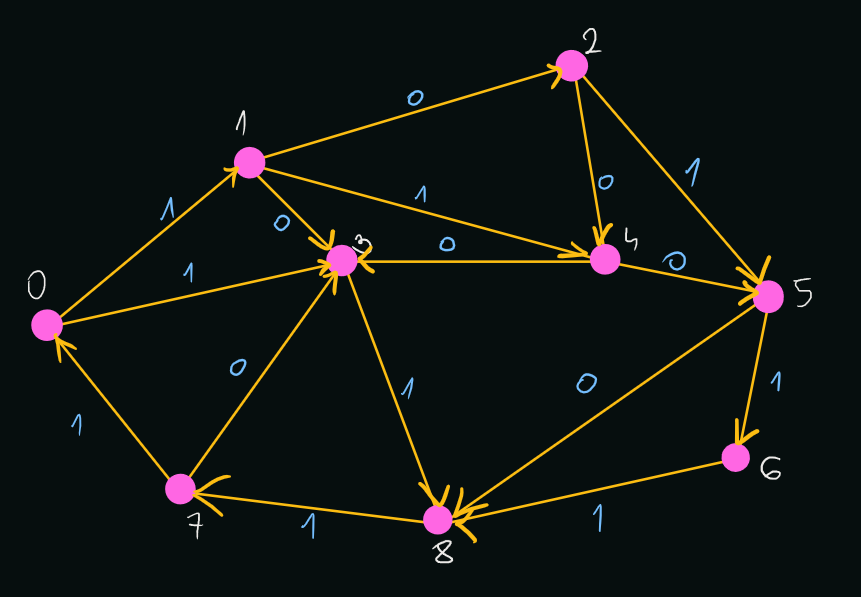

In [7]:
E = [(0, 1, 1), (1, 2, 0), (1, 4, 1), (2, 4, 0), (0, 3, 1), (4, 3, 0), (1, 3, 0), (2, 5, 1),
     (4, 5, 0), (7, 0, 1), (7, 3, 0), (8, 7, 1), (3, 8, 1), (5, 8, 0), (5, 6, 1), (6, 8, 1)]
G = directed_graph_list(E)
print(*G, sep='\n')

[(1, 1), (3, 1)]
[(2, 0), (4, 1), (3, 0)]
[(4, 0), (5, 1)]
[(8, 1)]
[(3, 0), (5, 0)]
[(8, 0), (6, 1)]
[(8, 1)]
[(0, 1), (3, 0)]
[(7, 1)]


In [8]:
print(min_cost_path(G, 0, 8))

(1, [0, 1, 2, 4, 5, 8])


In [9]:
print(min_cost_path(G, 0, 6))

(2, [0, 1, 2, 4, 5, 6])


In [10]:
print(min_cost_path(G, 8, 2))

(3, [8, 7, 0, 1, 2])


In [11]:
print(min_cost_path(G, 3, 6))

(5, [3, 8, 7, 0, 1, 2, 4, 5, 6])


# 2) Sprytne rozwiązanie

### Omówienie algorytmu

Najlepsze rozwiązanie problemu opisane jest tutaj:
###### LINK: https://www.geeksforgeeks.org/0-1-bfs-shortest-path-binary-graph/
<br><br>
Problem dałoby się również rozwiązać dla innych wag krawędzi, nawet jeżeli byśmy mieli kilka różnych wag (o ile są one dostatecznie małe - w ogólności - ich górna wartość wag jest ograniczona przez stałą). W przypadku krawędzi o większych wagach wystarczy dodać na tych krawędziach tyle wierzchołków, ile potrzeba aby w miejscu danej krawędzi znalazło się $ w $ krawędzi, gdzie $ w $ jest wagą początkowej krawędzi. Innymi słowy, dodajemy na krawędzi $ w - 1 $ wierzchołków.
<br><br>
Poniżej zamieszczam link do podobnego problemu, rozwiązanego dla grafu z krawędziami o wagach 1 i 2:
###### LINK: https://www.geeksforgeeks.org/shortest-path-weighted-graph-weight-edge-1-2/

### Złożoność

###### Obliczeniowa:
$ O(V + E) $ (jest to złożoność zwykle lepsza od $ O(E \cdot log(V)) $
###### Pamięciowa:
$ O(V) $

### Implementacja #1
##### (Dla grafu nieskierowanego)

In [12]:
from collections import deque


def restore_path(parents, s, t):
    path = [t]
    u = t
    while parents[u] != s:
        u = parents[u]
        path.append(u)
    path.append(s)
    # Reverse a path to get subsequent vertices in the right order
    return path[::-1]


def min_cost_path(G: 'undirected graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    dist = [inf] * n
    parents = [-1] * n
    q = deque()
    dist[s] = 0
    q.append(s)
    
    while q:
        u = q.popleft()
        if u == t: break
        for edge in G[u]:
            v = edge[0]
            weight = edge[1]
            if dist[v] > dist[u] + weight:
                dist[v] = dist[u] + weight
                parents[v] = u
                # If a weight of an edge is equal to 0, this edge will be taken again at first
                if weight == 0: q.appendleft(edge[0])
                # Else, put an edge at the end of the queue in order to be checked later
                else: q.append(edge[0])
    # If no path was found
    else:
        return None
    
    return restore_path(parents, s, t)
    
                    
def undirected_graph_list(E: 'array of edges'):
    # Count a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph array
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))
        G[edge[1]].append((edge[0], edge[2]))
    return G

###### Kilka testów

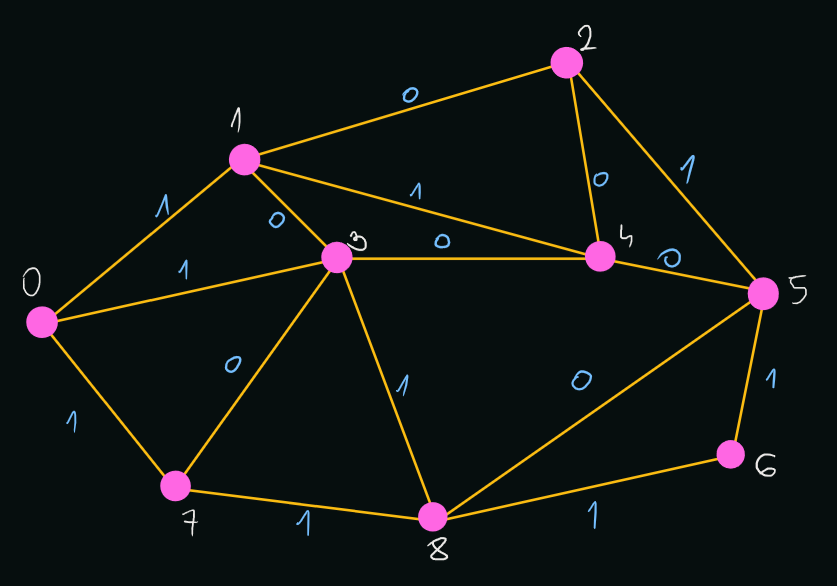

In [13]:
E = [(0, 1, 1), (1, 2, 0), (1, 4, 1), (2, 4, 0), (2, 5, 1), (0, 3, 1), (3, 4, 0), (4, 5, 0),
     (0, 7, 1), (7, 3, 0), (3, 8, 1), (7, 8, 1), (8, 5, 0), (8, 6, 1), (6, 5, 1), (1, 3, 0)]
G = undirected_graph_list(E)
print(*G, sep='\n')

[(1, 1), (3, 1), (7, 1)]
[(0, 1), (2, 0), (4, 1), (3, 0)]
[(1, 0), (4, 0), (5, 1)]
[(0, 1), (4, 0), (7, 0), (8, 1), (1, 0)]
[(1, 1), (2, 0), (3, 0), (5, 0)]
[(2, 1), (4, 0), (8, 0), (6, 1)]
[(8, 1), (5, 1)]
[(0, 1), (3, 0), (8, 1)]
[(3, 1), (7, 1), (5, 0), (6, 1)]


In [14]:
print(min_cost_path(G, 0, 8))

[0, 1, 2, 4, 5, 8]


In [15]:
print(min_cost_path(G, 0, 6))

[0, 1, 2, 4, 5, 6]


In [16]:
print(min_cost_path(G, 8, 2))

[8, 5, 4, 2]


# Ten algorytm poniżej nie działa

### Omówienie algorytmu

###### UWAGA:
Sposób działania usuwania wierzchołków i zbędnych krawędzi został przedstwiony tutaj: [Omówienie mapowania grafu](#map-graph)

### Złożoność

###### Obliczeniowa:
$ O(V + E) $ (jest to złożoność zwykle lepsza od $ O(E \cdot log(V)) $
###### Pamięciowa:
$ O(V) $

### Implementacja #1
#### (Dla grafu nieskierowanego)
##### (Z kopiowaniem grafu wejściowego)

In [17]:
from queue import Queue


class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight
        # Store pointers to both neighbours linked lists
        self.next = None
        self.prev = None
        self.v_list = None
        
    def __str__(self):
        return f"{self.u} - {self.v} ({self.weight})"
        

class Neighbours:
    def __init__(self, vertex):
        self.vertex = vertex
        self.head = self.tail = Edge(None, None, None)  # Sentinel node
    
    def __iter__(self):
        curr = self.head.next
        while curr:
            yield curr.v, curr.weight
            curr = curr.next
            
    def __str__(self):
        result = []
        for edge in self:
            result.append(str(f'{edge[0]} ({edge[1]})'))
        return f"{self.vertex}:  {' -> '.join(result)}"
    

def undirected_graph_ll(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph array
    G = [Neighbours(u) for u in range(n)]
    for e in E:
        u = e[0]
        v = e[1]
        
        uv_edge = Edge(u, v, e[2])
        G[u].tail.next = uv_edge
        uv_edge.prev = G[u].tail
        G[u].tail = uv_edge
        
        vu_edge = Edge(v, u, e[2])
        G[v].tail.next = vu_edge
        vu_edge.prev = G[v].tail
        G[v].tail = vu_edge
        
        uv_edge.v_list = vu_edge
        vu_edge.v_list = uv_edge
        
    return G


# def map_graph(G):
#     """
#     Removes free edges and joins vertices which are connected with them.
#     This function creates also a graph of removed edges with 0 
#     """
#     n = len(G)
    
#     # Look for all the edges with 0 weight
#     to_remove = []
#     for u in range(n):
#         edge = G[u].head.next
#         while edge:
#             if not edge.weight and edge.v > u:
#                 to_remove.append(edge)
#             edge = edge.next
            
#     # Start removing edges in a loop
#     for edge in to_remove:
#         u = edge.u
#         v = edge.v
#         u_curr = edge
#         v_curr = edge.v_list
#         # Remove an edge between u and v vertices
#         u_curr.prev.next = u_curr.next
#         v_curr.prev.next = v_curr.next
#         # Update a tail if it was removed or the previous node pointer if not
#         if not u_curr.next: G[u].tail = u_curr.prev
#         else: u_curr.next.prev = u_curr.prev
#         if not v_curr.next: G[v].tail = v_curr.prev
#         else: v_curr.next.prev = v_curr.prev
#         # Join edges which were connected tu v vertex which will be
#         # merged with the u vertex (only if they haven't been merged before)
#         if G[u] == G[v]: continue
#         G[u].tail.next = G[v].head.next
#         G[v].head.next.prev = G[u].tail
#         G[u].tail = G[v].tail
#         # Replace a v vertex with u as both vertices were merged
#         G[v] = G[u]
        
#     # Map indices of the new graph vertices and remove redundant vertices (mapped)
#     mapped = fix_indexing(G)
    
#     # Remove all redundant edges (which connect nonexistent vertices)
#     remove_duplicate_edges(G)
            
#     return mapped


def map_graph(G):
    """
    Removes free edges and joins vertices which are connected with them.
    This function creates also a graph of removed edges with 0 
    """
    n = len(G)
    
    # Look for all the edges with 0 weight
    to_remove = []
    for u in range(n):
        edge = G[u].head.next
        while edge:
            if not edge.weight and edge.v > u:
                to_remove.append(edge)
            edge = edge.next
            
    # There will be created a new graph of edges of 0 weights
    G2 = [Neighbours(u) for u in range(n)]
    # Start removing edges in a loop
    for edge in to_remove:
        u = edge.u
        v = edge.v
        u_curr = edge
        v_curr = edge.v_list
        # Remove an edge between u and v vertices
        u_curr.prev.next = u_curr.next
        v_curr.prev.next = v_curr.next
        # Update a tail if it was removed or the previous node pointer if not
        if not u_curr.next: G[u].tail = u_curr.prev
        else: u_curr.next.prev = u_curr.prev
        if not v_curr.next: G[v].tail = v_curr.prev
        else: v_curr.next.prev = v_curr.prev
        # Join edges which were connected tu v vertex which will be
        # merged with the u vertex (only if they haven't been merged before)
        if G[u] == G[v]: continue
        G[u].tail.next = G[v].head.next
        G[v].head.next.prev = G[u].tail
        G[u].tail = G[v].tail
        # Replace a v vertex with u as both vertices were merged
        G[v] = G[u]
        
        # In G2 graph add a new edge which is the one removed above
        u_curr.next = v_curr.next = None
        G2[u].tail.next = u_curr
        u_curr.prev = G2[u].tail
        G2[u].tail = u_curr
        G2[v].tail.next = v_curr
        v_curr.prev = G2[v].tail
        G2[v].tail = v_curr
        
    print('Before fix:')
    print(*G, sep='\n')
    # Map indices of the new graph vertices and remove redundant vertices (mapped)
    mapped = fix_indexing(G)
    
    # Remove all redundant edges (which connect nonexistent vertices)
    remove_duplicate_edges(G)
            
    return mapped, G2


def fix_indexing(G):
    n = len(G)
    indices = [-1] * n
    mapped  = [-1] * n
    indices[0] = mapped[0] = 0
    idx = 0
    
    for i in range(1, n):
        u = G[i].vertex
        if indices[u] < 0:
            idx += 1
            indices[u] = idx
            G[idx] = G[i]
        mapped[i] = indices[u]
        
    # Remove all redundant rows (vertices)
    idx += 1
    for _ in range(idx, n): G.pop()
        
    # Fix indices of the edges
    for u in range(len(G)):
        G[u].vertex = u
        curr = G[u].head.next
        while curr:
            curr.u = u
            curr.v = mapped[curr.v]
            curr = curr.next
        
    return mapped


def remove_duplicate_edges(G):
    n = len(G)
    connected = [[False] * n for _ in range(n)]
    
    for u in range(n):
        prev = G[u].head
        while prev.next:
            v = prev.next.v
            if not connected[u][v] and v != u:
                connected[u][v] = True
                prev = prev.next
            else:
                prev.next = prev.next.next
                if prev.next: 
                    prev.next.prev = prev
                else: 
                    G[u].tail = prev
                    break
                    

def swap(A, i, j):
    A[i], A[j] = A[j], A[i]


def min_cost_path(G: 'undirected graph represented using adjacency linked lists',
                  s: 'source',
                  t: 'target'):
    # Map graph (remove all edges with no cost and merge vertices which are
    # connected with such edges)
    indices, G2 = map_graph(G)
    # Our current mapped graph will contain only such edges which must be
    # visited when going from one vertex to another. The idea now is pretty simple
    # as we can run a traditional BFS shortest path algorithm.
    n = len(G)
    q = Queue()
    parents = [-1] * n
    costs = [0] * n
    q.put(s)
    
    print('Mapped:')
    print(*G, sep='\n')
    print('G2:')
    print(*G2, sep='\n')
    
    while not q.empty():
        u = q.get()
        if u == indices[t]: break
        for v, _ in G[u]:
            if not costs[v]:
                costs[v] = costs[u] + 1
                parents[v] = u
                q.put(v)

    # If a loop wasn't broken, no path exists
    else:
        return -1, []
    
    # Restore path
    return costs[indices[t]], restore_path(G, G2, parents, indices, s, t)


def restore_path(G, G2, parents, indices, s, t):
    # Find a path in the mapped graph
    u = indices[t]
    path1 = [u]  # path from the mapped G graph
    while u != indices[s]:
        u = parents[u]
        path1.append(u)
    
    # Find a path in the graph of edges with 0 weights
    # in each of the mapped graph's path
    path = []
    print(indices)
    print(path1)

###### Kilka testów

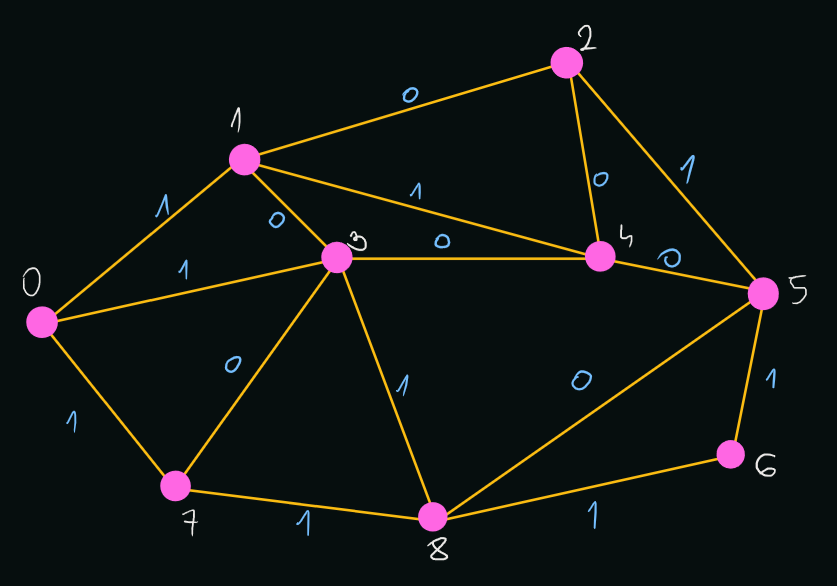

In [18]:
E = [(0, 1, 1), (1, 2, 0), (1, 4, 1), (2, 4, 0), (2, 5, 1), (0, 3, 1), (3, 4, 0), (4, 5, 0),
     (0, 7, 1), (7, 3, 0), (3, 8, 1), (7, 8, 1), (8, 5, 0), (8, 6, 1), (6, 5, 1), (1, 3, 0)]
G = undirected_graph_ll(E)
print(*G, sep='\n')

0:  1 (1) -> 3 (1) -> 7 (1)
1:  0 (1) -> 2 (0) -> 4 (1) -> 3 (0)
2:  1 (0) -> 4 (0) -> 5 (1)
3:  0 (1) -> 4 (0) -> 7 (0) -> 8 (1) -> 1 (0)
4:  1 (1) -> 2 (0) -> 3 (0) -> 5 (0)
5:  2 (1) -> 4 (0) -> 8 (0) -> 6 (1)
6:  8 (1) -> 5 (1)
7:  0 (1) -> 3 (0) -> 8 (1)
8:  3 (1) -> 7 (1) -> 5 (0) -> 6 (1)


In [19]:
print(min_cost_path(G, 0, 8))

Before fix:
0:  1 (1) -> 3 (1) -> 7 (1)
1:  0 (1) -> 4 (1) -> 5 (1) -> 0 (1) -> 8 (1) -> 1 (1) -> 0 (1) -> 8 (1) -> 2 (1) -> 6 (1) -> 3 (1) -> 7 (1) -> 6 (1)
1:  0 (1) -> 4 (1) -> 5 (1) -> 0 (1) -> 8 (1) -> 1 (1) -> 0 (1) -> 8 (1) -> 2 (1) -> 6 (1) -> 3 (1) -> 7 (1) -> 6 (1)
1:  0 (1) -> 4 (1) -> 5 (1) -> 0 (1) -> 8 (1) -> 1 (1) -> 0 (1) -> 8 (1) -> 2 (1) -> 6 (1) -> 3 (1) -> 7 (1) -> 6 (1)
1:  0 (1) -> 4 (1) -> 5 (1) -> 0 (1) -> 8 (1) -> 1 (1) -> 0 (1) -> 8 (1) -> 2 (1) -> 6 (1) -> 3 (1) -> 7 (1) -> 6 (1)
1:  0 (1) -> 4 (1) -> 5 (1) -> 0 (1) -> 8 (1) -> 1 (1) -> 0 (1) -> 8 (1) -> 2 (1) -> 6 (1) -> 3 (1) -> 7 (1) -> 6 (1)
6:  8 (1) -> 5 (1)
1:  0 (1) -> 4 (1) -> 5 (1) -> 0 (1) -> 8 (1) -> 1 (1) -> 0 (1) -> 8 (1) -> 2 (1) -> 6 (1) -> 3 (1) -> 7 (1) -> 6 (1)
1:  0 (1) -> 4 (1) -> 5 (1) -> 0 (1) -> 8 (1) -> 1 (1) -> 0 (1) -> 8 (1) -> 2 (1) -> 6 (1) -> 3 (1) -> 7 (1) -> 6 (1)
Mapped:
0:  1 (1)
1:  0 (1) -> 2 (1)
2:  1 (1)
G2:
0:  
1:  2 (0) -> 3 (0)
2:  1 (0) -> 4 (0)
3:  1 (0) -> 7 (0)
4:

In [20]:
print(min_cost_path(G, 0, 6))

Before fix:
0:  1 (1)
1:  0 (1) -> 2 (1)
2:  1 (1)
Mapped:
0:  1 (1)
1:  0 (1) -> 2 (1)
2:  1 (1)
G2:
0:  
1:  
2:  


IndexError: list index out of range

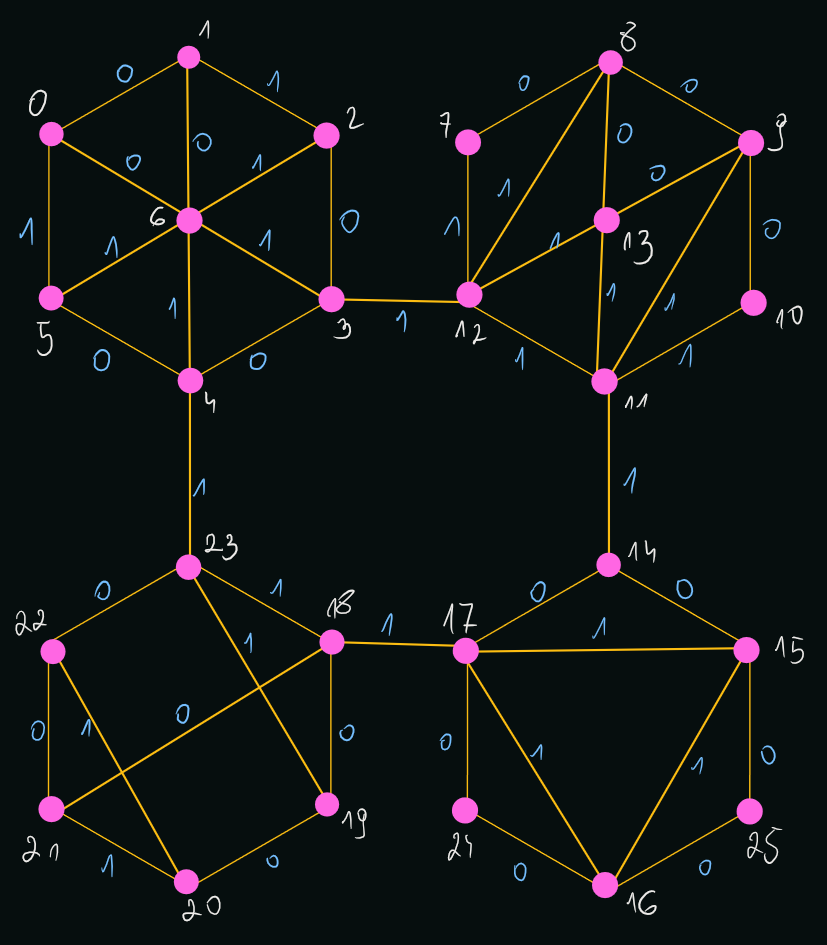

In [ ]:
E = [(0, 1, 0), (1, 2, 1), (2, 3, 0), (3, 4, 0), (4, 5, 0), (5, 0, 1), (0, 6, 0), (1, 6, 0),
     (2, 6, 1), (5, 6, 1), (4, 6, 1), (3, 6, 1), (3, 12, 1), (12, 7, 1), (7, 8, 0), (12, 8, 1),
     (8, 9, 0), (8, 13, 0), (12, 13, 1), (12, 11, 1), (13, 11, 1), (13, 9, 0), (11, 9, 1),
     (9, 10, 0), (10, 11, 1), (11, 14, 1), (14, 15, 0), (14, 17, 0), (15, 17, 1), (15, 16, 1),
     (17, 16, 1), (15, 25, 0), (25, 16, 0), (17, 24, 0), (24, 16, 0), (18, 17, 1), (23, 18, 1),
     (22, 23, 0), (22, 21, 0), (21, 20, 1), (20, 19, 0), (19, 18, 0), (23, 19, 1), (22, 20, 1),
     (21, 18, 1), (23, 4, 1)]

G = undirected_graph_ll(E)

In [ ]:
print(map_graph(G))

# Pomocnicze

### Omówienie mapowania grafu <a class="anchor" id="map-graph"></a>

###### Krok I:
Szukamy krawędzi, które mają wagi równe 0. Rozpoczynamy szukanie od wierzchołka o indeksie 0 i dla kolejnych wierzchołków zapisujemy tylko takie krawędzie $ u - v $, dla których $ u \lt v $ (po to, aby uniknąć powtórzeń).

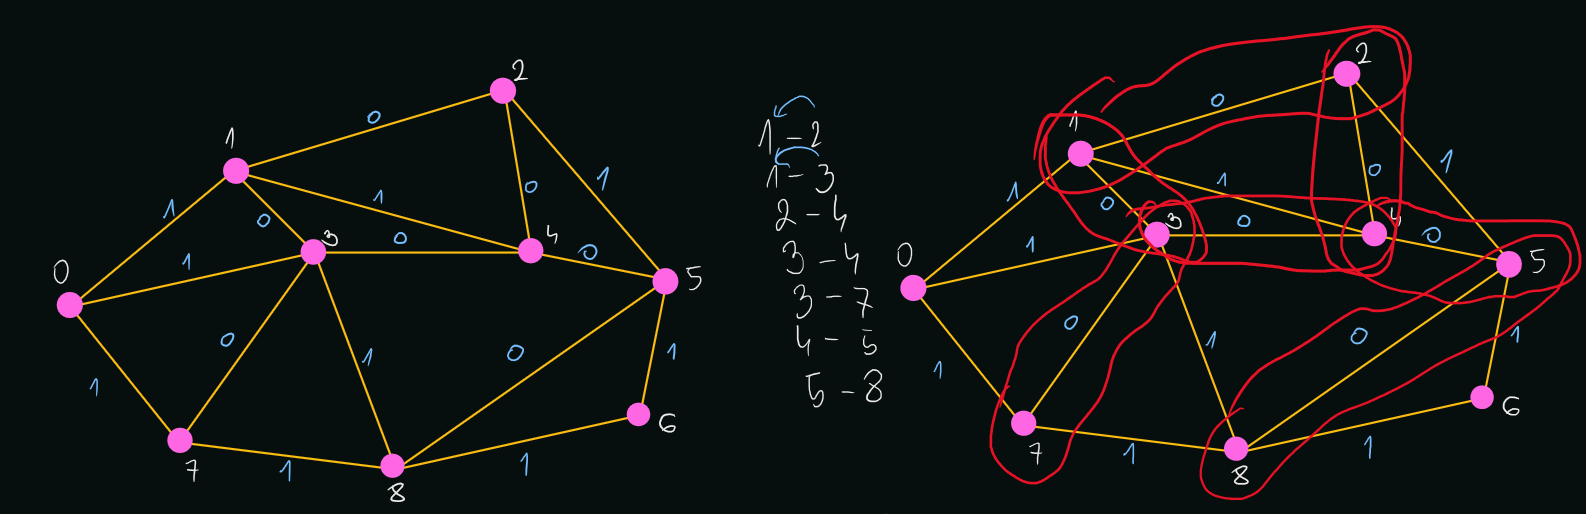

###### Krok II:
Usuwamy w pętli kolejne krawędzie o wadze 0. Usuwanie polega na tym, że dla krawędzi $ u - v $ (łączącej wierzchołki $ u $ oraz $ v $), przepinamy wszystkie krawędzie, jakie wychodziły z wierzchołka $ v $ do wierzchołka $ u $. Aby działało to płynnie, najlepiej trzymać sąsiadów w postaci list odsyłaczowych. Wówczas wystarczy przepiąć wskaźnik na pierwszy element listy sąsiadów wierzchołka $ v $ do ostatniego elementu listy sąsiadów wierzchołka $ u $. Ponieważ również na tej liście w grafie nieskierowanym znajduje się wskazanie na krawędź powrotną (tzn. $ v - u $), a więc jako sąsiad wierzchołka $ u $ pojawi się on sam, musimy go usunąć. Wystarczy więc przejść przez doklejoną listę i usunąć z niej wierzchołek $ u $. Taka operacja ma złożoność maksymalnie $ O(n) $, a więc można to nieco ulepszyć. Ponieważ lista sąsiadów jest listą odsyłaczową, możemy po prostu stworzyć obiekt $ Edge $, który poza wskaźnikiem na kolejny element listy sąsiadów danego wierzchołka $ u $, będzie posiadał wskaźnik na węzeł (obiekt $ Edge $), który znajduje się w liście sąsiadów wierzchołka $ v $. Tym samym w czasie $ O(1) $ przeskoczymy do listy sąsiadów scalanego wierzchołka i usuniemy z niej w czasie $ O(1) $ sąsiada, z którym scaliliśmy dany wierzchołek. W takim przypadku utrzymamy sumaryczną złożoność na poziomie $ O(V + E) $.

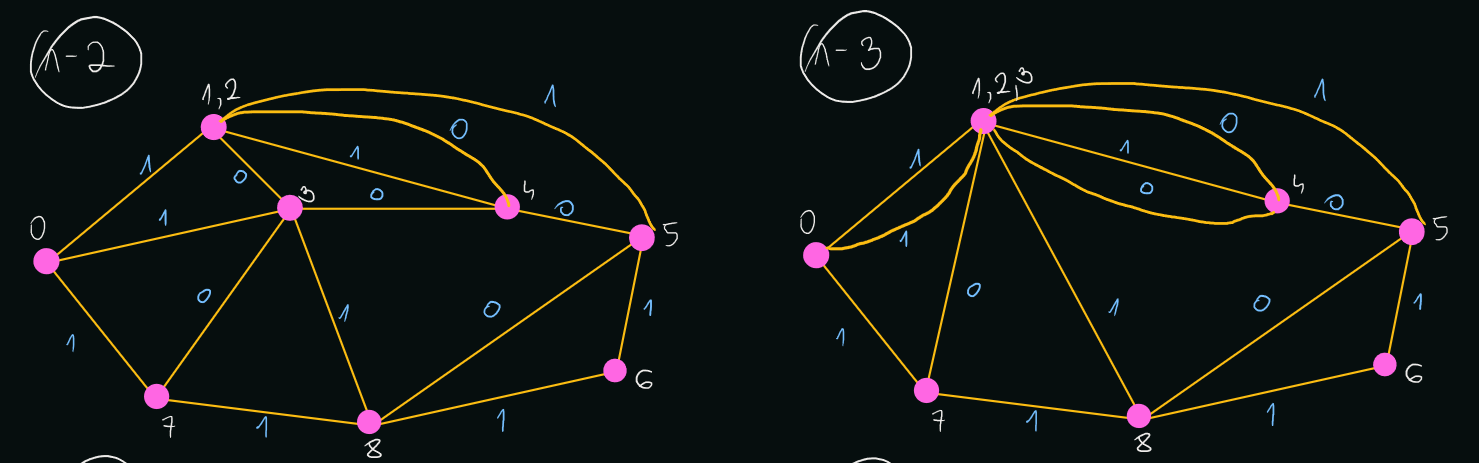
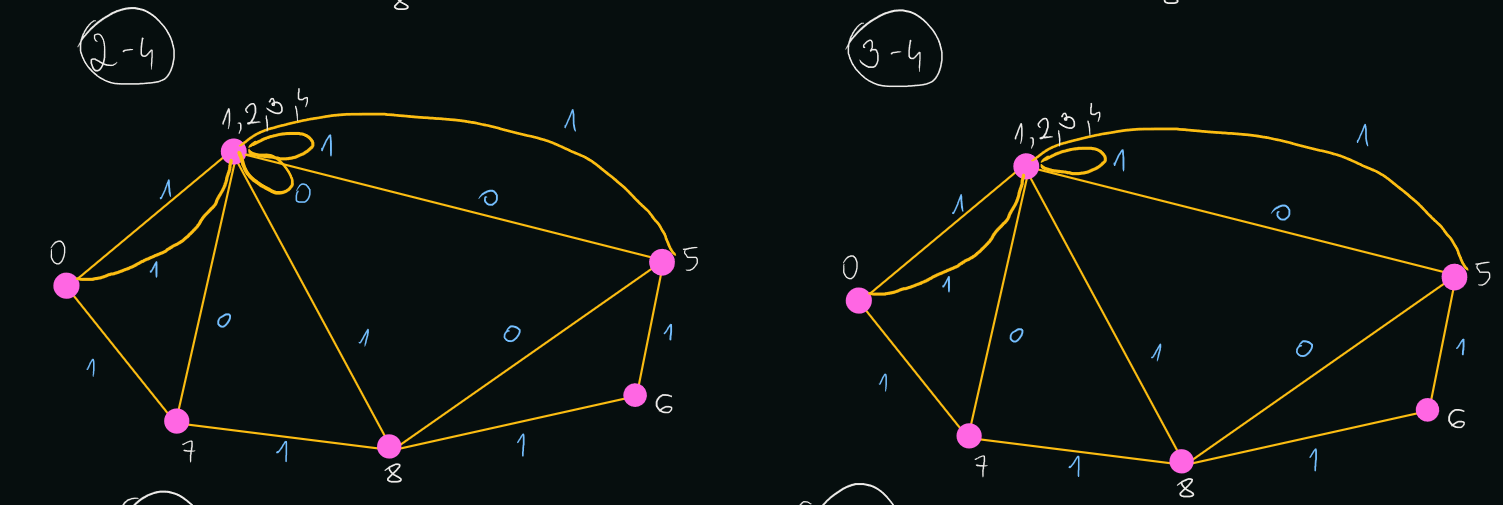
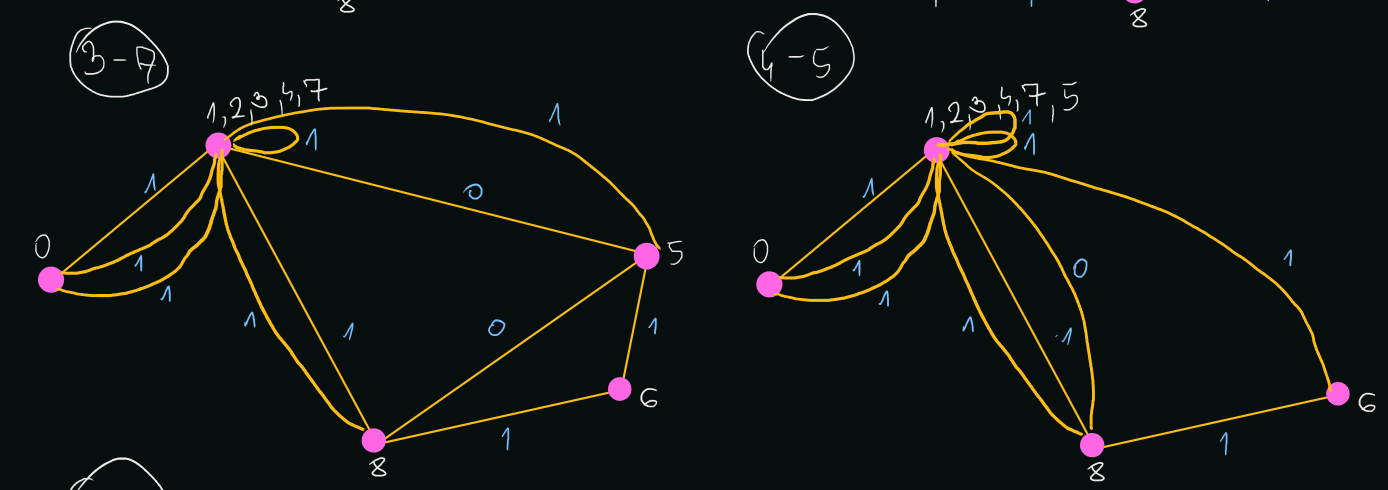
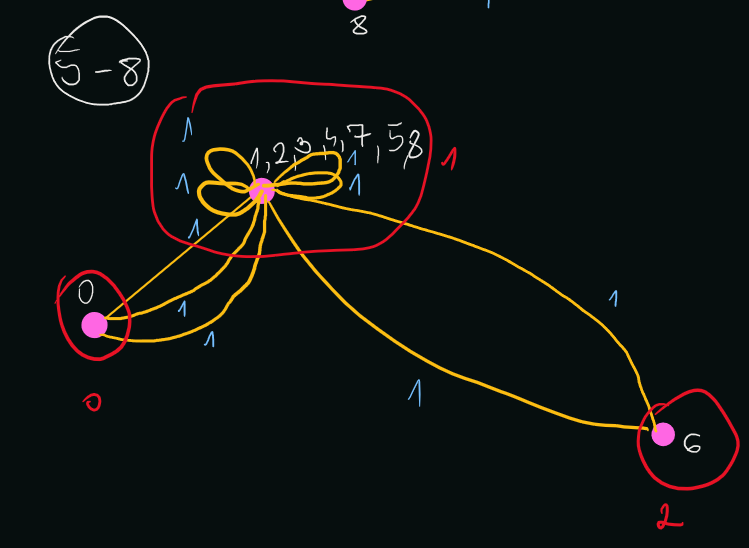

###### Krok III:
Ostatnim krokiem, który jest bardziej estetyczny niż konieczny, jest usunięcie krawędzi wielokrotnych oraz przemapowanie indeksów wierzchołków grafu wejściowego na indeksy wierzchołków w otrzymanym wyżej grafie.

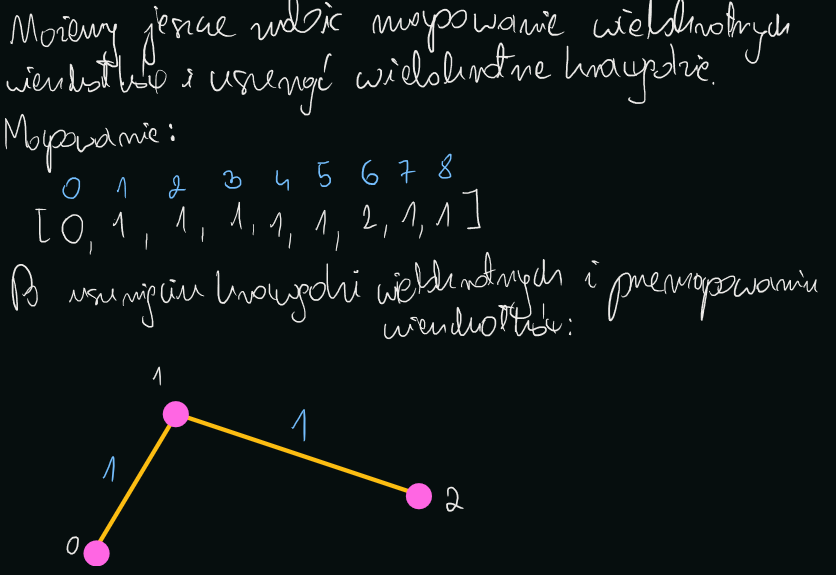

##### Troubleshooting

In [ ]:
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight
        # Store pointers to both neighbours linked lists
        self.next = None
        self.prev = None
        self.v_list = None
        

class Neighbours:
    def __init__(self, vertex):
        self.vertex = vertex
        self.head = self.tail = Edge(None, None, None)  # Sentinel node
    
    def __iter__(self):
        curr = self.head
        while curr:
            yield curr.v, curr.weight
            curr = curr.next
            
    def __str__(self):
        iterator = iter(self)
        next(iterator)
        result = []
        for edge in iterator:
            result.append(str(f'{edge[0]} ({edge[1]})'))
        return f"{self.vertex}:  {' -> '.join(result)}"
    

def undirected_graph_ll(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph array
    G = [Neighbours(u) for u in range(n)]
    for e in E:
        u = e[0]
        v = e[1]
        
        uv_edge = Edge(u, v, e[2])
        G[u].tail.next = uv_edge
        uv_edge.prev = G[u].tail
        G[u].tail = uv_edge
        
        vu_edge = Edge(v, u, e[2])
        G[v].tail.next = vu_edge
        vu_edge.prev = G[v].tail
        G[v].tail = vu_edge
        
        uv_edge.v_list = vu_edge
        vu_edge.v_list = uv_edge
        
    return G


def map_graph(G):
    """Removes free edges and joins vertices which are connected with them"""
    n = len(G)
    
    # Look for all the edges with 0 weight
    to_remove = []
    for u in range(n):
        edge = G[u].head.next
        while edge:
            if not edge.weight and edge.v > u:
                to_remove.append(edge)
            edge = edge.next
            
    # Start removing edges in a loop
    for edge in to_remove:
        print('Edge:', edge.u, edge.v)
        print(*G, sep='\n')
        u = edge.u
        v = edge.v
        u_curr = edge
        v_curr = edge.v_list
        # Remove an edge between u and v vertices
        print('u before removal:', G[u])
        print('v before removal:', G[v])
        u_curr.prev.next = u_curr.next
        print('u prev-curr-next:', (u_curr.prev.u, u_curr.prev.v), (u_curr.u, u_curr.v), u_curr.next and (u_curr.next.u, u_curr.next.v))
        print('v prev-curr-next:', (v_curr.prev.u, v_curr.prev.v), (v_curr.u, v_curr.v), v_curr.next and (v_curr.next.u, v_curr.next.v))
        v_curr.prev.next = v_curr.next
        print('Probalby? removed u list:', (u_curr.u, u_curr.v))
        print('Probalby? removed v list:', (v_curr.u, v_curr.v))
        print('u after removal:', G[u])
        print('v after removal:', G[v])
        if not u_curr.next: 
            print('now u')
            G[u].tail = u_curr.prev
        else:
            u_curr.next.prev = u_curr.prev
            
        if not v_curr.next:
            print('now v')
            G[v].tail = v_curr.prev
        else:
            v_curr.next.prev = v_curr.prev
        # Join edges which were connected tu v vertex which will be
        # merged with the u vertex (only if they haven't been merged before)
        if G[u] == G[v]: continue
        G[u].tail.next = G[v].head.next
        G[v].head.next.prev = G[u].tail
        G[u].tail = G[v].tail
        # Replace a v vertex with u as both vertices were merged
        G[v] = G[u]
        print()
    
    print(*G, sep='\n')
    print()

###### Kilka testów

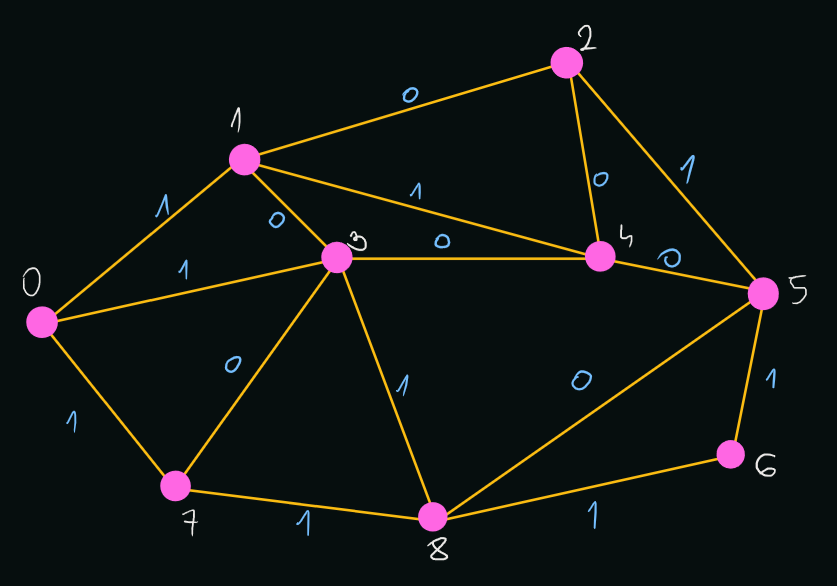

In [ ]:
E = [(0, 1, 1), (1, 2, 0), (1, 4, 1), (2, 4, 0), (2, 5, 1), (0, 3, 1), (3, 4, 0), (4, 5, 0),
     (0, 7, 1), (7, 3, 0), (3, 8, 1), (7, 8, 1), (8, 5, 0), (8, 6, 1), (6, 5, 1), (1, 3, 0)]
G = undirected_graph_ll(E)
print(*G, sep='\n')

In [ ]:
map_graph(G)